$ \color{green }{\text{Model domain:}}$ single stream:  Length = 1000 m, Width = 1 m, dx = 10 m, dy= 1 m, Q = 0.1 m$^3$/sec

$\color{green}{\text{Mesh:}}$ generated logical mesh

$\color{green}{\text{Bondary conditions:}}$ prescribed concentration at the inlet boundary face (x=0 m)

$\color{green}{\text{Initial conditions:}}$ provided by pflotran (see data/pflotran_in/denitrification_reach.in)

$\text{Diffusion = 0.0 m$^2$/sec, Dispersion = 0}$

$\color{green}{\text{Simulation time :}}$ 10 hours

$\color{green}{\text{Chemsitry:}}$ denitrification

$\color{green}{\text{Benchmark:}}$  PFloTran denitrification results

$\color{green}{\text{Plotting:}}$  PFloTran and ATS DOM, Oxyten and Nitrate concentration [moles/Liter] in the entire stream at time = 10 hour

$\color{red} {\text{$\textbf{Note:}$ This is exactly the same simulation as provided in 01_stream, but using logical meshes }}$

In [1]:
import sys, os, math, h5py, csv
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np
sys.path.append('/Users/ajc/Core/codes/simulator/debug/ats/tools/utils')
import read_helper as read
import seaborn as sns


In [2]:
path = '/Users/ajc/FUSE/simulations/tests/ats-demos/13_reactive_transport/01_stream_logical'

In [3]:
# Read PFOTRAN standalone data
pflotran_file = os.path.join(path, 'data/pflotran_out/denitrification_reach.tec')
pflotran_data = dict()
#plfotran_data['time'] = np.loadtxt(pflotran_file,usecols=3,skiprows=3) #time in hours
pflotran_data['X'] = np.loadtxt(pflotran_file,usecols=0,skiprows=3)  # Tracer 1
pflotran_data['DOM1'] = np.loadtxt(pflotran_file,usecols=3,skiprows=3)  # DOM
pflotran_data['O2(aq)'] = np.loadtxt(pflotran_file,usecols=4,skiprows=3)  # Oxygen
pflotran_data['NO3-'] = np.loadtxt(pflotran_file,usecols=5,skiprows=3)  # Nitrate


In [4]:
F=['test']
Files = [os.path.join(path,f,'visdump_surface_data.h5') for f in F]
vars = ['surface-total_component_concentration', 'surface-total_component_concentration','surface-total_component_concentration']
Suffix = ['.cell.DOM1', '.cell.NO3-', '.cell.O2(aq)']

/Users/ajc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/Users/ajc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


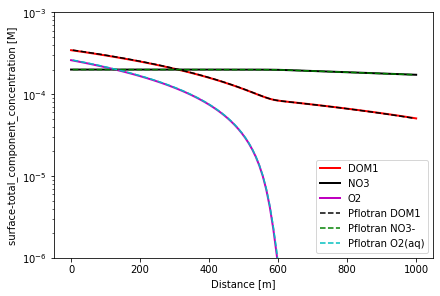

In [5]:
#%matplotlib qt
fig, axs = plt.subplots(1,1, figsize=(6,4), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1]})
fig.subplots_adjust(hspace =.02, wspace=1.02)
plt.tight_layout()
#axs = axs.ravel()

Colors = ['r','k','m']
F_L = ['DOM1', 'NO3', 'O2']
X = np.linspace(0,1000,100)

for i, v in enumerate(vars):

    plt.subplot(111)
    for j,f in enumerate(Files):
        dat = read.GetSurfVarFromVis_All(f,v,suffix=Suffix[i])[v]
        
        data = np.array(dat[-1])
        plt.semilogy(X,1e-3*data,'-',color=Colors[i],label=F_L[i],linewidth=2)
        
        #percentage removal of a species
        #data_pc = [100*(dat[0][0] - d1 )/dat[0][0] for d1 in data]
        #plt.plot(X,data_pc,color=Colors[i],label=F_L[i],linewidth=2)
        
    #plt.ylabel('component removal [%]')    
    plt.ylabel(vars[i] + ' [M]') # Molarity = Moles/liter
    plt.xlabel('Distance [m]')
    
plt.semilogy(pflotran_data['X'],pflotran_data['DOM1'],'k',linestyle='--',label='Pflotran DOM1')
plt.semilogy(pflotran_data['X'], pflotran_data['NO3-'],'g',linestyle='--',label='Pflotran NO3-')
plt.semilogy(pflotran_data['X'], pflotran_data['O2(aq)'],'c',linestyle='--',label='Pflotran O2(aq)')
plt.legend(loc='lower right',fontsize=10)

plt.ylim(1e-6,1e-3)

plt.show()